In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap

plt.style.use('fivethirtyeight')


In [3]:
class Perceptron:
  def __init__(self,eta:float=None,epochs:int=None):
    self.weights=np.random.randn(3)*1e-4
    training= (eta is not None) and (epochs is not None)
    if training:
      print(f"initial weights before training: \n{self.weights}")
    self.eta=eta
    self.epochs=epochs

  def _z_outcome(sel,inputs,weights):
    return np.dot(inputs,weights)

  def activation_function(self,z):
    return np.where(z>0,1,0)

  def fit(self, x,y):
    self.x=x
    self.y=y

    x_with_bias=np.c_[self.x, -np.ones((len(self.x),1))]
    print(f"x with bias: \n{x_with_bias}")

    for epoch in range(self.epochs):
      print(f"for epoch >> {epoch}")

      z=self._z_outcome(x_with_bias,self.weights)
      y_hat=self.activation_function(z)
      print(f"predicted value after forward pass: \n{y_hat}")

      self.error=self.y-y_hat
      print(f"error: \n{self.error}")

      self.weights=self.weights+self.eta*np.dot(x_with_bias.T,self.error)

      print(f"updated weights after epoch: {epoch}/{self.epochs}: \n{self.weights}")
      print("##"*10)

  def predict(self,x):
    x_with_bias=np.c_[x,-np.ones((len(x),1))]
    z=self._z_outcome(x_with_bias,self.weights)
    return self.activation_function(z)

  def total_loss(self):
    total_loss=np.sum(self.error)
    print(f"\ntotal loss: {total_loss}\n")
    return total_loss

  def _create_dir_return_path(self,model_dir,filename):
    os.makedirs(model_dir,exist_ok=True)
    return os.path.join(model_dir,filename)



  def save(self,filename,model_dir=None):
    if model_dir is not None:
      model_file_path=self._create_dir_return_path(model_dir,filename)
      joblib.dump(self,model_file_path)
    else:
      model_file_path=self._create_dir_return_path("model",filename)
      joblib.dump(self,model_file_path)

  def load(self):
    return joblib.load(self.model_file_path)

In [4]:
def prepare_data(df,target_col="y"):
  x=df.drop(target_col,axis=1)
  y=df[target_col]
  return x,y

In [5]:
AND={
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,0,0,1]
}

df_AND=pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [6]:
x,y=prepare_data(df_AND)
ETA=0.1
EPOCHS=10
model_and=Perceptron(eta=ETA,epochs=EPOCHS)
model_and.fit(x,y)


_=model_and.total_loss()

initial weights before training: 
[-1.95724574e-04 -4.56936812e-05  2.28337071e-05]
x with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch >> 0
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 0/10: 
[ 0.09980428  0.09995431 -0.09997717]
####################
for epoch >> 1
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[-1.95724574e-04 -4.56936812e-05  2.00022834e-01]
####################
for epoch >> 2
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[0.09980428 0.09995431 0.10002283]
####################
for epoch >> 3
predicted value after forward pass: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[0.09980428 0.09995431 0.100022

In [7]:
model_and.save(filename="and.model")

In [8]:
from joblib import load

# Load the model using joblib
reload_model_and = load("model/and.model")


In [9]:
reload_model_and.predict(x=[[1,1]])

array([1])

In [10]:
OR={
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,1,1,1]
}

df_OR=pd.DataFrame(OR)
df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [11]:
x,y=prepare_data(df_OR)
ETA=0.1
EPOCHS=10
model_or=Perceptron(eta=ETA,epochs=EPOCHS)
model_or.fit(x,y)


_=model_or.total_loss()

initial weights before training: 
[ 6.10700258e-05  7.57257404e-06 -1.81311952e-04]
x with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch >> 0
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 0/10: 
[6.10700258e-05 7.57257404e-06 9.98186880e-02]
####################
for epoch >> 1
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[ 0.20006107  0.20000757 -0.20018131]
####################
for epoch >> 2
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[ 0.20006107  0.20000757 -0.10018131]
####################
for epoch >> 3
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[ 2.00061070e-01  2.00007573e-0

In [12]:
XOR={
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,1,1,0]
}

df_XOR=pd.DataFrame(XOR)
df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [13]:
x,y=prepare_data(df_XOR)
ETA=0.1
EPOCHS=10
model_xor=Perceptron(eta=ETA,epochs=EPOCHS)
model_xor.fit(x,y)


_=model_xor.total_loss()

initial weights before training: 
[ 0.00012927  0.00020787 -0.00023675]
x with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch >> 0
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 0/10: 
[-0.09987073 -0.09979213  0.19976325]
####################
for epoch >> 1
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[ 0.00012927  0.00020787 -0.00023675]
####################
for epoch >> 2
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[-0.09987073 -0.09979213  0.19976325]
####################
for epoch >> 3
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[ 0.00012927  0.00020787 -0.00023675]
##############

In [14]:
def save_plot(df,model,filename="plot.png",plot_dir="plots"):
  def _create_base_plot(df):
    df.plot(kind="scatter",x="x1",y="x2",c="y",s=100,cmap="coolwarm")
    plt.axhline(y=0,color="black",linestyle="--",linewidth=1)
    plt.axvline(x=0,color="black",linestyle="--",linewidth=1)

    figure=plt.gcf()
    figure.set_size_inches(10,8)



  def _plot_decision_regions(x,y,classifier,resolution=0.02):
    colors=("red","blue","lightgreen","gray","cyan")
    cmap=ListedColormap(colors[:len(np.unique(y))])

    x=x.values
    y=y.values

    x1=x[:,0]
    x2=x[:,1]

    x1_min,x1_max=x1.min()-1,x1.max()+1
    x2_min,x2_max=x2.min()-1,x2.max()+1

    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                        np.arange(x2_min,x2_max,resolution))

    y_hat=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    y_hat=y_hat.reshape(xx1.shape)
    plt.contourf(xx1,xx2,y_hat,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    plt.plot()

  x,y=prepare_data(df)

  _create_base_plot(df)
  _plot_decision_regions(x,y,model)

  plot_dir="plots"
  os.makedirs(plot_dir,exist_ok=True)
  plot_path=os.path.join(plot_dir,filename)
  plt.savefig(plot_path)

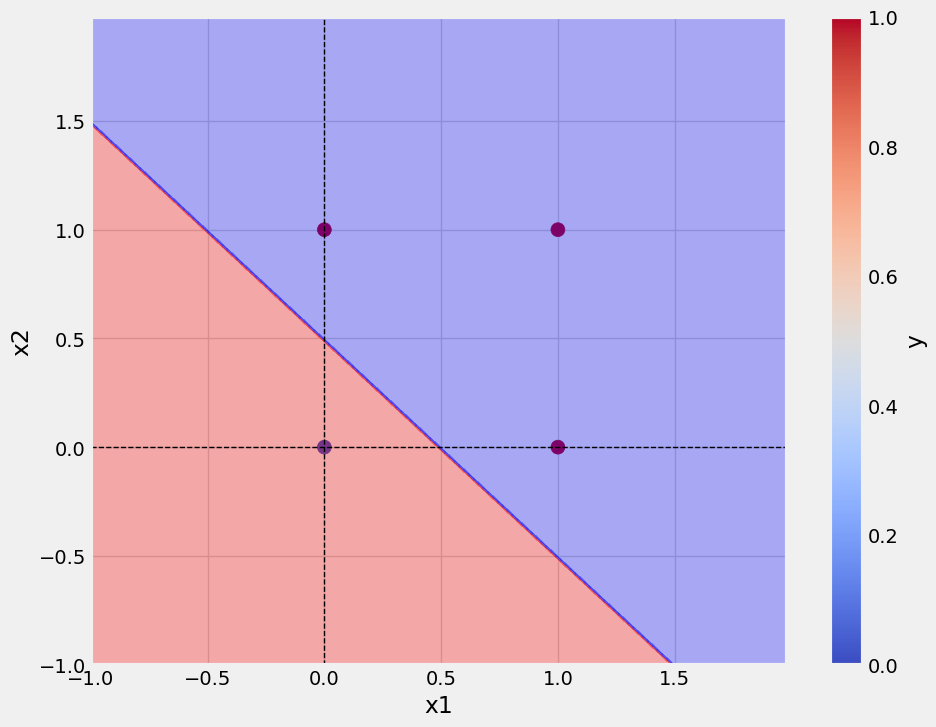

In [15]:
save_plot(df_OR,model_or,"or.png")

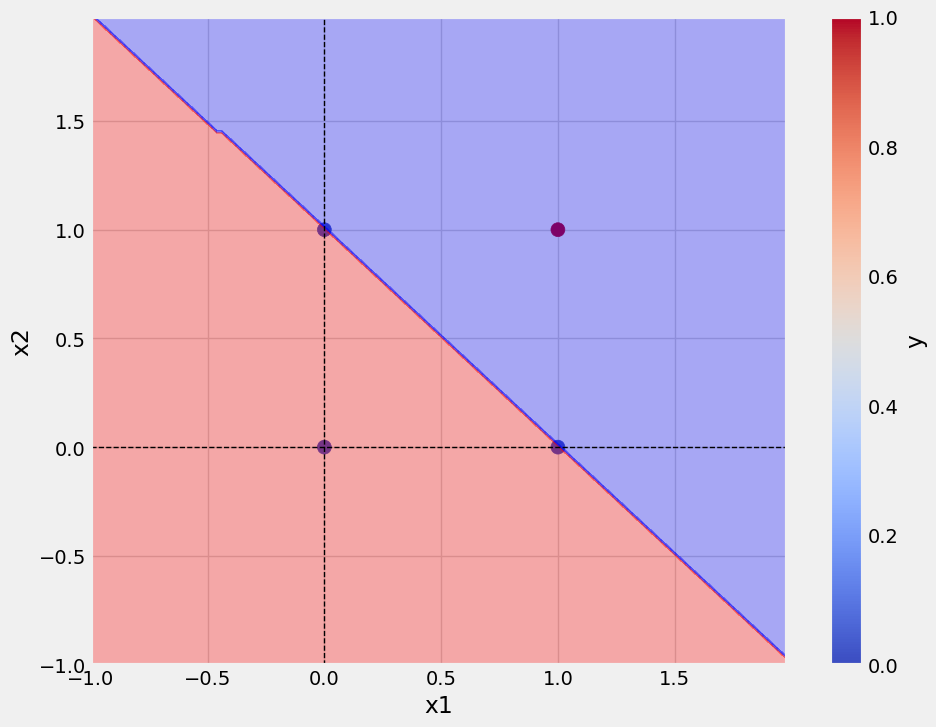

In [16]:
save_plot(df_AND,model_and,"and.png")

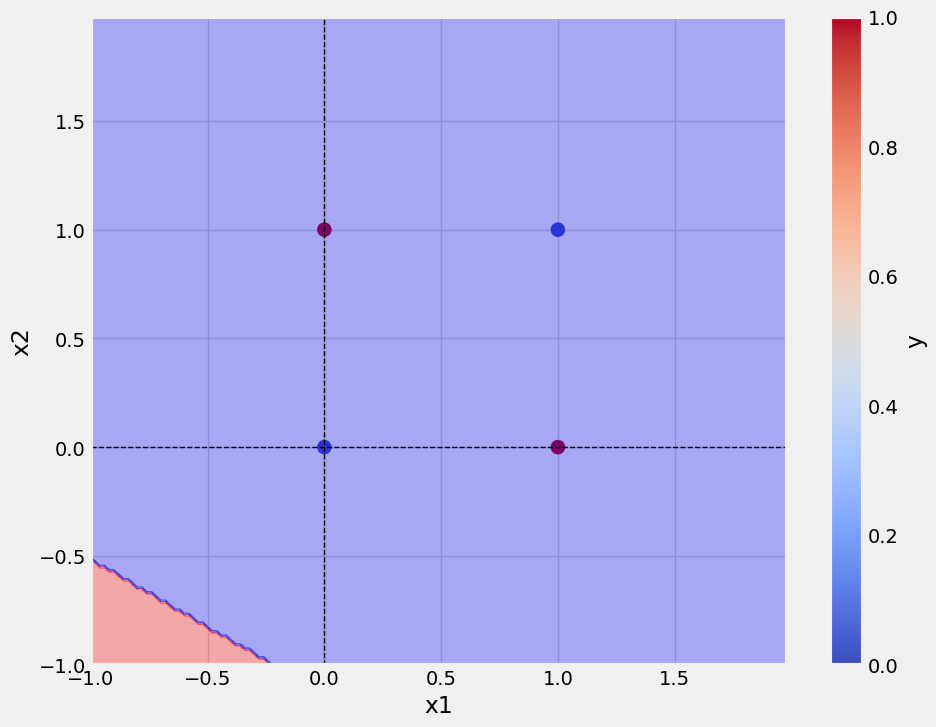

In [17]:
save_plot(df_XOR,model_xor,"xor.png")